In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, string, nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punct = string.punctuation + ")" + "(" + ":" + ";"

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
sample = pd.read_excel('Sample_Submission.xlsx')

In [3]:
train.head(60)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00


In [4]:
test.head(60)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"
5,Understanding a Photograph (Penguin Modern Cla...,John Berger,"Paperback,– 7 Nov 2013",5.0 out of 5 stars,2 customer reviews,John Berger's writings on photography are some...,"Arts History, Theory & Criticism (Books)","Arts, Film & Photography"
6,Dance Music Manual,Rick Snoman,"Paperback,– Import, 5 Feb 2019",5.0 out of 5 stars,1 customer review,"Dance Music Manual, aimed at the novice and se...",Music Books,"Computing, Internet & Digital Media"
7,A Clash of Kings (A Song of Ice and Fire),George R.R. Martin,"Paperback,– 29 Mar 2012",4.3 out of 5 stars,117 customer reviews,"The second volume of A Song of Ice and Fire, t...",Action & Adventure (Books),"Crime, Thriller & Mystery"
8,An Era of Darkness: The British Empire in India,Shashi Tharoor,"Hardcover,– 27 Oct 2016",4.4 out of 5 stars,550 customer reviews,"In 1930, the American historian and philosophe...",Asian History,Politics
9,Doing Justice: A Prosecutor’s Thoughts on Crim...,Preet Bharara,"Paperback,– 19 Mar 2019",4.4 out of 5 stars,6 customer reviews,A Guardian Pick for 2019\nThe People vs. Putin...,True Accounts (Books),Action & Adventure


In [5]:
train.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [6]:
test.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,Doing Justice: A Prosecutor’s Thoughts on Crim...,Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [9]:
train.Price = np.log1p(train.Price)

In [10]:
q1 = train.Price.quantile(0.25)
q3 = train.Price.quantile(0.75)
iqr = q3-q1
upper = q3+2.5*iqr
lower = q1-2.5*iqr
x = np.where((train.Price < lower )| (train.Price.values>upper))
train.drop(index = x[0], inplace=True)
train.reset_index(drop=True, inplace=True)

In [11]:
def words(text):
    return(len(str(text).lower().split())/len(str(text)))

def n_unique_word(text):
    return(len(set(str(text).lower().split()))/len(str(text)))

def letter(text):
    return(len(str(text)))

def n_clean_words(text):
    s = [w for w in str(text).split() if w not in stopwords and w not in list(punct)]
    return(len(s)/len(str(text)))

def n_stopwords(text):
    s = [w for w in str(text).split() if w in stopwords]
    return(len(s)/len(str(text)))

def n_punctuation(text):
    s = [w for w in str(text).lower().split() if w in list(punct)]
    return(len(s)/len(str(text)))

def n_title(text):
    s = [w for w in str(text).split() if w.istitle()]
    return(len(s)/len(str(text)))

def n_Upper(text):
    s = [w for w in str(text).split() if w.isupper()]
    return(len(s)/len(str(text)))

def n_Lower(text):
    s = [w for w in str(text).split() if w.islower()]
    return(len(s)/len(str(text)))

train['Title_unique_word'] = train.Title.apply(lambda x: n_unique_word(x))
test['Title_unique_word'] = test.Title.apply(lambda x: n_unique_word(x))

train['Synopsis_unique_word'] = train.Synopsis.apply(lambda x: n_unique_word(x))
test['Synopsis_unique_word'] = test.Synopsis.apply(lambda x: n_unique_word(x))

train['Title_count'] = train.Title.apply(lambda x: words(x))
test['Title_count'] = test.Title.apply(lambda x: words(x))

train['Synopsis_count'] = train.Synopsis.apply(lambda x: words(x))
test['Synopsis_count'] = test.Synopsis.apply(lambda x: words(x))

train['Title_count_char'] = train.Title.apply(lambda x: letter(x))
test['Title_count_char'] = test.Title.apply(lambda x: letter(x))

train['Synopsis_count_char'] = train.Synopsis.apply(lambda x: letter(x))
test['Synopsis_count_char'] = test.Synopsis.apply(lambda x: letter(x))

train['Title_n_st'] = train.Title.apply(lambda x: n_stopwords(x))
test['Title_n_st'] = test.Title.apply(lambda x: n_stopwords(x))

train['Synopsis_n_st'] = train.Synopsis.apply(lambda x: n_stopwords(x))
test['Synopsis_n_st'] = test.Synopsis.apply(lambda x: n_stopwords(x))

train['Title_n_punct'] = train.Title.apply(lambda x: n_punctuation(x))
test['Title_n_punct'] = test.Title.apply(lambda x: n_punctuation(x))

train['Synopsis_n_punct'] = train.Synopsis.apply(lambda x: n_punctuation(x))
test['Synopsis_n_punct'] = test.Synopsis.apply(lambda x: n_punctuation(x))

train['Title_title_word'] = train.Title.apply(lambda x: n_title(x))
test['Title_title_word'] = test.Title.apply(lambda x: n_title(x))

train['Synopsis_title_word'] = train.Synopsis.apply(lambda x: n_title(x))
test['Synopsis_title_word'] = test.Synopsis.apply(lambda x: n_title(x))

train['Title_upper_word'] = train.Title.apply(lambda x: n_Upper(x))
test['Title_upper_word'] = test.Title.apply(lambda x: n_Upper(x))

train['Synopsis_upper_word'] = train.Synopsis.apply(lambda x: n_Upper(x))
test['Synopsis_upper_word'] = test.Synopsis.apply(lambda x: n_Upper(x))

train['Title_lower_word'] = train.Title.apply(lambda x: n_Lower(x))
test['Title_lower_word'] = test.Title.apply(lambda x: n_Lower(x))

train['Synopsis_lower_word'] = train.Synopsis.apply(lambda x: n_Lower(x))
test['Synopsis_lower_word'] = test.Synopsis.apply(lambda x: n_Lower(x))

train['Title_n_clean_word'] = train.Title.apply(lambda x: n_clean_words(x))
test['Title_n_clean_word'] = test.Title.apply(lambda x: n_clean_words(x))

train['Synopsis_n_clean_word'] = train.Synopsis.apply(lambda x: n_clean_words(x))
test['Synopsis_n_clean_word'] = test.Synopsis.apply(lambda x: n_clean_words(x))

#train['Title_0'] = train.Title.str.extract(r"(^.*):+(.*$)")[0]
#train['Title_1'] = train.Title.str.extract(r"(^.*):+(.*$)")[1]

#test['Title_0'] = test.Title.str.extract(r"(^.*):+(.*$)")[0]
#test['Title_1'] = test.Title.str.extract(r"(^.*):+(.*$)")[1]

#train['Title_0'] = train.Title_0.apply(lambda x: words(x))
#test['Title_0'] = test.Title_0.apply(lambda x: words(x))

#train['Title_1'] = train.Title_1.apply(lambda x: words(x))
#test['Title_1'] = test.Title_1.apply(lambda x: words(x))

In [12]:
au_tr = set(train.Author).difference(set(test.Author))
au_te = set(test.Author).difference(set(train.Author))
train['Author_1'] = train.Author.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Author_1'] = test.Author.apply(lambda x: 'other' if x in (au_te) else x)

In [13]:
train['time'] = train.Edition.str.extract(r"(\d* [a-zA-Z]* \d\d\d\d$)")
test['time']  = test.Edition.str.extract(r"(\d* [a-zA-Z]* \d\d\d\d$)")

import datetime
def days(text):
    try :
        x = datetime.datetime.strptime(str(text), "%d %b %Y")
    except :
        x = 0
    return(x)

train['time'] = train.time.apply(lambda x: days(x))
test['time']  = test.time.apply(lambda x: days(x))

def jj(text):
    try:
        x = datetime.datetime.now() - text
        y = x.days
    except:
        y = 0
    return(y)
train['time'] = train.time.apply(lambda x: jj(x))
test['time'] = test.time.apply(lambda x: jj(x))

In [14]:
train['Date'] = train.Edition.str.extract(r"(\d\d\d\d$)")
test['Date'] = test.Edition.str.extract(r"(\d\d\d\d$)")

train.Date.fillna(2020, inplace=True)
test.Date.fillna(2020, inplace=True)

train.Date = train.Date.apply(lambda x: 2020-int(x))
test.Date = test.Date.apply(lambda x: 2020-int(x))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

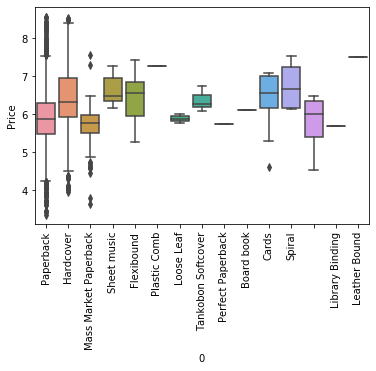

In [15]:
sns.boxplot(train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0], train.Price)
#test.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts()
plt.xticks(rotation=90)

In [16]:
train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts()

Paperback                5185
Hardcover                 813
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral                      4
                            4
Tankobon Softcover          3
Loose Leaf                  2
Board book                  1
Perfect Paperback           1
Library Binding             1
Leather Bound               1
Plastic Comb                1
Name: 0, dtype: int64

In [17]:
train['Edition_1'] = train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')
test['Edition_1'] = test.Edition.str.extract(r'(^[a-zA-Z|\s]*)')

train.Edition_1.replace({'':'Mass Market Paperback'}, inplace=True)
test.Edition_1.replace({'':'Mass Market Paperback'}, inplace=True)

g = train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts().index[0:5]

train.Edition_1 = train.Edition_1.apply(lambda x: 'other' if x not in g else x)
test.Edition_1 = test.Edition_1.apply(lambda x: 'other' if x not in g else x)

In [18]:
#train['Edition_1'] = train.Edition.str.extract(r'(^[a-zA-Z|\s]*),.*')
#test['Edition_1'] = test.Edition.str.extract(r'(^[a-zA-Z|\s]*),.*')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

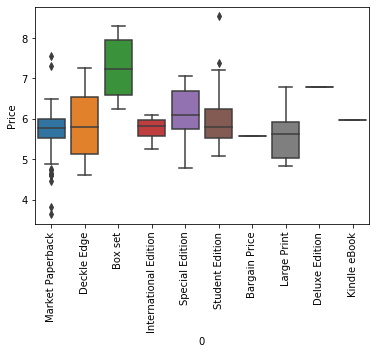

In [19]:
sns.boxplot(train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0], train.Price)
#test.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts()
plt.xticks(rotation=90)

In [20]:
train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0].value_counts()

Market Paperback         154
Special Edition           18
Student Edition           14
Box set                   11
International Edition     10
Large Print                9
Deckle Edge                7
Deluxe Edition             1
Kindle eBook               1
Bargain Price              1
Name: 0, dtype: int64

In [21]:
test.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0].value_counts()

Market Paperback         45
International Edition     4
Box set                   3
Special Edition           3
Student Edition           2
Deckle Edge               1
Kindle eBook              1
Large Print               1
Name: 0, dtype: int64

In [22]:
train['Edition_2'] = train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')
test['Edition_2'] = test.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')

g = train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0].value_counts().index[0:7]

train.Edition_2 = train.Edition_2.apply(lambda x: 'other' if x not in g else x)
test.Edition_2 = test.Edition_2.apply(lambda x: 'other' if x not in g else x)

In [23]:
train['Edition_3'] = train.Edition.str.extract(r'^.* -*(.*),.*')
test['Edition_3'] = test.Edition.str.extract(r'^.* -*(.*),.*')

In [24]:
train.Edition_3.fillna('NA', inplace=True)
test.Edition_3.fillna('NA', inplace=True)

In [25]:
t = set(train.Edition_3.value_counts().index).difference(set(test.Edition_3.value_counts().index))
train.Edition_3 = train.Edition_3.apply(lambda x: np.NaN if x in list(t) else x)

In [26]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [27]:
train['Review_t'] = train.Reviews.str.extract(r"(^\d\.*\d*)")
test['Review_t'] = test.Reviews.str.extract(r"(^\d\.*\d*)")

In [28]:
train['Rating_t'] = train.Ratings.str.extract(r"(^\d+)")
test['Rating_t'] = test.Ratings.str.extract(r"(^\d+)")

In [29]:
train['Rat_Rev'] = train.Rating_t.astype('float') * train.Review_t.astype('float')
test['Rat_Rev'] = test.Rating_t.astype('float') * test.Review_t.astype('float')

train['Raev'] = train.Rating_t.astype('float') / train.Review_t.astype('float')
test['Raev'] = test.Rating_t.astype('float') / test.Review_t.astype('float')

train['day_review'] = train.time.astype('float')/train.Review_t.astype('float')
test['day_review'] = test.time.astype('float')/test.Review_t.astype('float')

train['day_rating'] = train.time.astype('float')/train.Rating_t.astype('float')
test['day_rating'] = test.time.astype('float')/test.Rating_t.astype('float')

train['yr_review'] = train.Date.astype('float')/train.Review_t.astype('float')
test['yr_review'] = test.Date.astype('float')/test.Review_t.astype('float')

train['yr_rating'] = train.Date.astype('float')/train.Rating_t.astype('float')
test['yr_rating'] = test.Date.astype('float')/test.Rating_t.astype('float')

train['yr_Rat_Rev'] = train.Date.astype('float') * train.Rat_Rev.astype('float')
test['yr_Rat_Rev'] = test.Date.astype('float') * test.Rat_Rev.astype('float')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

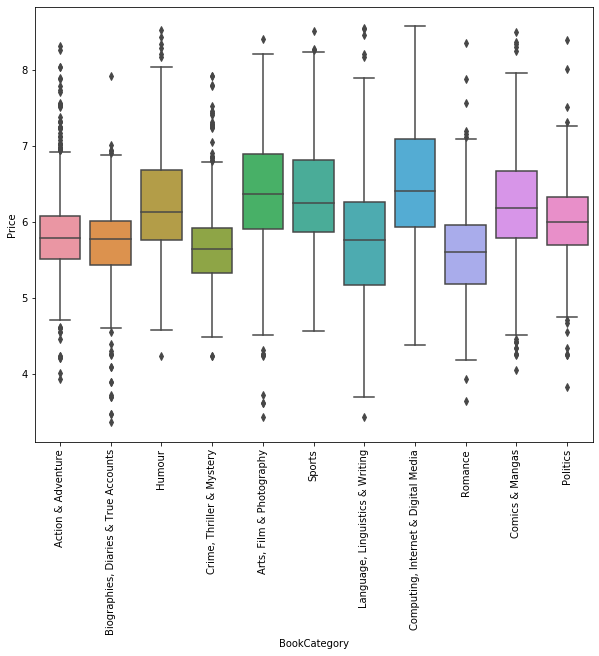

In [30]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(train.BookCategory, train.Price)
plt.xticks(rotation=90)

In [31]:
train['Genre_1'] = train.Genre.str.extract('([a-zA-Z|)|(]*)$')
test['Genre_1']  = test.Genre.str.extract('([a-zA-Z|)|(]*)$')

train.Genre_1.replace({'(Books)': 'Books'}, inplace=True)
test.Genre_1.replace({'(Books)': 'Books'}, inplace=True)


g = train.Genre.str.extract('([a-zA-Z|)|(]*)$')[0].value_counts().index[0:14]
train['Genre_1'] = train.Genre_1.apply(lambda x: 'other' if x not in g else x)
test['Genre_1']  = test.Genre_1.apply(lambda x: 'other' if x not in g else x)

In [32]:
au_tr = set(train.Genre).difference(set(test.Genre))
au_te = set(test.Genre).difference(set(train.Genre))
train['Genre_t'] = train.Genre.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Genre_t'] = test.Genre.apply(lambda x: 'other' if x in (au_te) else x)

In [33]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english', use_idf=True)
x = tfidf.fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0).str.lower())

tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english', use_idf=True)
z = tfidf.fit_transform(pd.concat([train.Title, test.Title], axis = 0).str.lower())

tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english', use_idf=True)
e = tfidf.fit_transform(pd.concat([train.Genre_t, test.Genre_t], axis = 0).str.lower())

tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english', use_idf=True)
a = tfidf.fit_transform(pd.concat([train.Author_1, test.Author_1], axis = 0).str.lower())

In [34]:
#x = CountVectorizer().fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

In [35]:
from sklearn.decomposition import TruncatedSVD
t = []
pca = TruncatedSVD(n_components=100)
x = pd.DataFrame(pca.fit_transform(x), columns = [a for a in range(100)])
t.append(sum(pca.explained_variance_ratio_))

pca = TruncatedSVD(n_components=60)
z = pd.DataFrame(pca.fit_transform(z), columns = [a for a in range(100,160)])
t.append(sum(pca.explained_variance_ratio_))

pca = TruncatedSVD(n_components=40)
e = pd.DataFrame(pca.fit_transform(e), columns = [a for a in range(160,200)])
t.append(sum(pca.explained_variance_ratio_))

pca = TruncatedSVD(n_components=60)
a = pd.DataFrame(pca.fit_transform(a), columns = [a for a in range(200,260)])
t.append(sum(pca.explained_variance_ratio_))

In [36]:
t

[0.12041726765666837,
 0.12840353549236735,
 0.7859268468588878,
 0.4776715291383813]

In [37]:
np.sum(pca.explained_variance_ratio_)

0.4776715291383813

In [38]:
train.shape, test.shape

((6207, 44), (1560, 43))

In [39]:
tr = x.iloc[:6207,:]
te = x.iloc[6207:,:]
te.reset_index(drop = True, inplace=True)

tr_z = z.iloc[:6207,:]
te_z = z.iloc[6207:,:]
te_z.reset_index(drop = True, inplace=True)

tr_e = e.iloc[:6207,:]
te_e = e.iloc[6207:,:]
te_e.reset_index(drop = True, inplace=True)

tr_a = a.iloc[:6207,:]
te_a = a.iloc[6207:,:]
te_a.reset_index(drop = True, inplace=True)

In [40]:
train = pd.concat([train, tr, tr_z, tr_e, tr_a], axis = 1)
test = pd.concat([test, te, te_z, te_e, te_a], axis = 1)

In [41]:
train.reset_index(drop = True, inplace=True)
train.shape, test.shape

((6207, 304), (1560, 303))

In [42]:
train.drop(columns = ['Author','Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)
test.drop(columns = ['Author','Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)

In [43]:
(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Columns: 297 entries, BookCategory to 259
dtypes: float64(284), int64(4), object(9)
memory usage: 14.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Columns: 296 entries, BookCategory to 259
dtypes: float64(283), int64(4), object(9)
memory usage: 3.5+ MB


(None, None)

In [44]:
train.head()

,BookCategory,Price,Title_unique_word,Synopsis_unique_word,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Title_n_st,Synopsis_n_st,...,250,251,252,253,254,255,256,257,258,259
0,Action & Adventure,5.398163,0.171429,0.126422,0.171429,0.165613,35,791,0.000000,0.059418,...,1.408681e-17,-1.412776e-17,1.496785e-17,-2.499722e-18,1.292843e-17,1.644997e-17,-9.358193e-18,-1.547303e-17,5.481930e-17,1.952582e-17
1,"Biographies, Diaries & True Accounts",5.317777,0.205882,0.104712,0.205882,0.159686,34,1146,0.029412,0.050611,...,-3.498357e-03,7.070324e-03,1.559672e-03,-1.097461e-03,-1.397486e-03,-1.215400e-03,1.560582e-03,-3.685631e-03,8.472606e-04,-5.594472e-03
2,Humour,5.703782,0.107143,0.107100,0.107143,0.151625,28,1662,0.000000,0.059567,...,3.889280e-19,-1.484635e-17,7.152990e-18,-2.436257e-18,9.096485e-18,3.702129e-18,3.607149e-18,4.107680e-18,9.229967e-18,7.950042e-18
3,"Crime, Thriller & Mystery",5.198497,0.205882,0.136150,0.205882,0.176056,34,426,0.029412,0.082160,...,1.072137e-08,-9.527624e-09,5.266373e-09,4.158209e-09,1.812762e-08,2.708079e-09,-2.430202e-08,-4.204784e-09,-9.878193e-09,9.620269e-09
4,"Arts, Film & Photography",6.873805,0.142857,0.110774,0.142857,0.157815,42,659,0.023810,0.068285,...,-1.435978e-17,2.175360e-16,-1.470631e-16,-8.582450e-19,-1.675861e-16,-3.570199e-17,-2.210212e-16,-1.691554e-16,1.233953e-16,2.785080e-17


In [45]:
train.Author_1 = train.Author_1.astype('category')
train.BookCategory = train.BookCategory.astype('category')
train.Edition_1 = train.Edition_1.astype('category')
train.Edition_2 = train.Edition_2.astype('category')
train.Edition_3 = train.Edition_3.astype('category')
train.Genre_t = train.Genre_t.astype('category')
train.Rating_t = train.Rating_t.astype('float')
train.Review_t = train.Review_t.astype('float')
train.Genre_1 = train.Genre_1.astype('category')

test.Author_1 = test.Author_1.astype('category')
test.BookCategory = test.BookCategory.astype('category')
test.Edition_1 = test.Edition_1.astype('category')
test.Edition_2 = test.Edition_2.astype('category')
test.Edition_3 = test.Edition_3.astype('category')
test.Genre_t = test.Genre_t.astype('category')
test.Rating_t = test.Rating_t.astype('float')
test.Review_t = test.Review_t.astype('float')
test.Genre_1 = test.Genre_1.astype('category')

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Columns: 297 entries, BookCategory to 259
dtypes: category(7), float64(286), int64(4)
memory usage: 13.8 MB


In [47]:
train_label = train.Price
train.drop(columns = 'Price', inplace=True)

In [48]:
train.shape, test.shape

((6207, 296), (1560, 296))

0.33052713640208375 0.6455296616447597


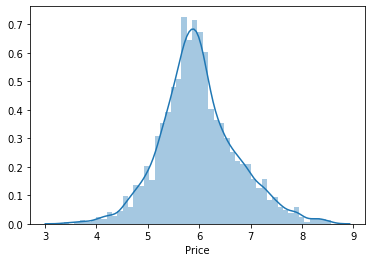

In [49]:
sns.distplot(train_label)
print(train_label.skew(), train_label.kurt())

In [50]:
pd.set_option('max_column',200)
train.head()

,BookCategory,Title_unique_word,Synopsis_unique_word,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_upper_word,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Title_n_clean_word,Synopsis_n_clean_word,Author_1,time,Date,Edition_1,Edition_2,Edition_3,Review_t,Rating_t,Rat_Rev,Raev,day_review,day_rating,yr_review,yr_rating,yr_Rat_Rev,Genre_1,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
0,Action & Adventure,0.171429,0.126422,0.171429,0.165613,35,791,0.000000,0.059418,0.0,0.0,0.114286,0.030341,0.000000,0.005057,0.000000,0.127686,0.171429,0.106195,other,1326,4,Paperback,other,NA,4.0,8.0,32.0,2.000000,331.500000,165.750000,1.000000,0.500000,128.0,Books,Action & Adventure (Books),0.096843,-0.060140,0.013973,-0.003380,0.019334,-0.013453,-0.002551,-0.059250,-0.004007,0.036959,-0.009721,-0.001728,0.012144,-0.009774,-0.005434,0.007132,0.023317,-0.012736,-0.009438,0.002412,0.012031,-0.001729,-0.024991,0.008843,-0.021529,-0.029536,-0.011290,-0.015605,-0.001221,0.002351,0.023972,0.015910,-0.017867,0.006768,-0.017067,-0.014756,-0.029275,-0.026657,0.025931,-0.008671,0.027227,-0.055114,0.009200,-0.002533,0.022511,0.005181,0.009885,-0.040597,0.036200,-0.003001,-0.045724,-0.017935,-0.000473,0.016797,0.024895,-0.045162,-0.016656,-0.034106,-0.007220,0.007740,0.011357,-0.000236,0.027668,0.009774,...,9.919174e-01,-1.218669e-01,-1.120697e-02,-9.857128e-03,-2.325338e-02,-8.423123e-06,-0.019162,-0.004511,-0.003106,-0.003294,-0.000124,-0.003574,-0.001175,-0.004767,-3.434861e-07,-0.000640,-0.002288,0.000305,-0.000655,-0.001674,-0.000342,-0.001279,-0.001332,-0.000300,-0.002416,-0.001346,0.000267,-0.002590,-0.000031,-0.000408,-0.000383,-0.001147,-0.001058,-0.000986,0.001626,-0.000830,-0.000149,-0.000821,0.000268,0.000581,-1.313179e-15,-1.633603e-15,-2.791862e-16,-8.739702e-16,7.806065e-17,-9.027560e-17,2.102963e-16,3.161215e-16,-1.167304e-16,3.686634e-17,-5.610077e-17,1.329449e-16,-1.138103e-17,-2.780739e-17,9.343564e-18,1.198535e-17,-1.918570e-17,-4.421701e-18,-1.014211e-17,-1.176906e-17,-3.186036e-18,-2.490251e-18,-5.033604e-18,5.951489e-18,-5.824841e-18,5.464865e-18,-4.028719e-18,-2.011096e-18,5.590878e-18,2.322619e-19,3.092807e-18,-1.725976e-17,-3.256125e-18,-1.665104e-17,-1.502116e-18,2.864237e-18,-7.375947e-19,-1.589317e-17,1.071840e-18,1.643907e-17,-8.776282e-18,6.646956e-18,-2.890330e-18,1.236084e-17,-1.762905e-17,4.846063e-17,1.006087e-17,-1.693903e-18,7.739757e-18,-1.044750e-17,1.408681e-17,-1.412776e-17,1.496785e-17,-2.499722e-18,1.292843e-17,1.644997e-17,-9.358193e-18,-1.547303e-17,5.481930e-17,1.952582e-17
1,"Biographies, Diaries & True Accounts",0.205882,0.104712,0.205882,0.159686,34,1146,0.029412,0.050611,0.0,0.0,0.176471,0.036649,0.029412,0.001745,0.029412,0.117801,0.176471,0.109075,Arun Khopkar,2545,8,Paperback,other,NA,3.9,14.0,54.6,3.589744,652.564103,181.785714,2.051282,0.571429,436.8,Books,Cinema & Broadcast (Books),0.109514,0.008713,-0.003952,0.041603,-0.009917,0.014293,0.011339,-0.008462,-0.038849,-0.045868,0.028763,0.020722,0.045245,-0.002179,-0.021331,-0.033087,0.014021,-0.011859,0.030871,-0.016818,-0.035029,-0.006055,-0.003797,-0.014824,0.015820,-0.066860,0.014231,-0.015095,0.010749,-0.022562,-0.015808,0.048577,-0.051087,-0.031726,0.061343,0.016139,-0.006771,0.014828,0.019100,0.017444,0.077783,0.012233,0.020481,-0.014822,0.043753,-0.024917,0.011141,-0.034742,-0.029408,0.

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.Author_1 = le.fit_transform(train.Author_1)
test.Author_1 = le.transform(test.Author_1)

train.Genre_1 = le.fit_transform(train.Genre_1)
test.Genre_1 = le.transform(test.Genre_1)

train.Genre_t = le.fit_transform(train.Genre_t)
test.Genre_t = le.transform(test.Genre_t)

train.shape, test.shape

((6207, 296), (1560, 296))

In [52]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
print(train.shape, test.shape)

(6207, 327) (1560, 327)


In [53]:
train['sum'] = np.sum(train, axis = 1)
train['min'] = np.min(train, axis = 1)
train['max'] = np.max(train, axis = 1)
train['std'] = np.std(train, axis = 1)
train['skew'] = train.skew(axis = 1)
train['kurt'] = train.kurt(axis = 1)
train['mean'] = np.mean(train, axis=1)
#train['median'] = np.median(train, axis=1)

test['sum'] = np.sum(test, axis = 1)
test['min'] = np.min(test, axis = 1)
test['max'] = np.max(test, axis = 1)
test['std'] = np.std(test, axis = 1)
test['skew'] = test.skew(axis = 1)
test['kurt'] = test.kurt(axis = 1)
test['mean'] = np.mean(test, axis=1)
#test['median'] = np.median(test, axis=1)

In [54]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#train = pd.DataFrame(sc.fit_transform(train), columns = train.columns)
#test  = pd.DataFrame(sc.transform(test), columns = test.columns)

In [55]:
train.head()

,Title_unique_word,Synopsis_unique_word,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_upper_word,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Title_n_clean_word,Synopsis_n_clean_word,Author_1,time,Date,Review_t,Rating_t,Rat_Rev,Raev,day_review,day_rating,yr_review,yr_rating,yr_Rat_Rev,Genre_1,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,...,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_1_Hardcover,Edition_1_Mass Market Paperback,Edition_1_Paperback,Edition_1_Sheet music,Edition_1_other,Edition_2_Deckle Edge,Edition_2_International Edition,Edition_2_Large Print,Edition_2_Market Paperback,Edition_2_Special Edition,Edition_2_Student Edition,Edition_2_other,Edition_3_Audiobook,Edition_3_Edge,Edition_3_Edition,Edition_3_Illustrated,Edition_3_Import,Edition_3_Leaf,Edition_3_NA,Edition_3_Paperback,Edition_3_Print,Edition_3_Unabridged,Edition_3_eBook,Edition_3_music,Edition_3_set,sum,min,max,std,skew,kurt,mean
0,0.171429,0.126422,0.171429,0.165613,35,791,0.000000,0.059418,0.0,0.0,0.114286,0.030341,0.000000,0.005057,0.000000,0.127686,0.171429,0.106195,530,1326,4,4.0,8.0,32.0,2.000000,331.500000,165.750000,1.000000,0.500000,128.0,0,1,0.096843,-0.060140,0.013973,-0.003380,0.019334,-0.013453,-0.002551,-0.059250,-0.004007,0.036959,-0.009721,-0.001728,0.012144,-0.009774,-0.005434,0.007132,0.023317,-0.012736,-0.009438,0.002412,0.012031,-0.001729,-0.024991,0.008843,-0.021529,-0.029536,-0.011290,-0.015605,-0.001221,0.002351,0.023972,0.015910,-0.017867,0.006768,-0.017067,-0.014756,-0.029275,-0.026657,0.025931,-0.008671,0.027227,-0.055114,0.009200,-0.002533,0.022511,0.005181,0.009885,-0.040597,0.036200,-0.003001,-0.045724,-0.017935,-0.000473,0.016797,0.024895,-0.045162,-0.016656,-0.034106,-0.007220,0.007740,0.011357,-0.000236,0.027668,0.009774,0.028445,-0.019369,-0.004783,-0.017386,...,-2.791862e-16,-8.739702e-16,7.806065e-17,-9.027560e-17,2.102963e-16,3.161215e-16,-1.167304e-16,3.686634e-17,-5.610077e-17,1.329449e-16,-1.138103e-17,-2.780739e-17,9.343564e-18,1.198535e-17,-1.918570e-17,-4.421701e-18,-1.014211e-17,-1.176906e-17,-3.186036e-18,-2.490251e-18,-5.033604e-18,5.951489e-18,-5.824841e-18,5.464865e-18,-4.028719e-18,-2.011096e-18,5.590878e-18,2.322619e-19,3.092807e-18,-1.725976e-17,-3.256125e-18,-1.665104e-17,-1.502116e-18,2.864237e-18,-7.375947e-19,-1.589317e-17,1.071840e-18,1.643907e-17,-8.776282e-18,6.646956e-18,-2.890330e-18,1.236084e-17,-1.762905e-17,4.846063e-17,1.006087e-17,-1.693903e-18,7.739757e-18,-1.044750e-17,1.408681e-17,-1.412776e-17,1.496785e-17,-2.499722e-18,1.292843e-17,1.644997e-17,-9.358193e-18,-1.547303e-17,5.481930e-17,1.952582e-17,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3364.709799,-0.121867,3364.709799,276.091505,11.092262,129.588980,31.563905
1,0.205882,0.104712,0.205882,0.159686,34,1146,0.029412,0.050611,0.0,0.0,0.176471,0.036649,0.029412,0.001745,0.029412,0.117801,0.176471,0.109075,36,2545,8,3.9,14.0,54.6,3.589744,652.564103,181.785714,2.051282,0.571429,436.8,0,49,0.109514,0.008713,-0.003952,0.041603,-0.009917,0.014293,0.011339,-0.008462,-0.038849,-0.045868,0.028763,0.020722,0.045245,-0.002179,-0.021331,-0.033087,0.014021,-0.011859,0.030871,-0.016818,-0.035029,-0.006055,-0.003797

In [56]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

In [57]:
#from sklearn.preprocessing import MinMaxScaler
#mmx = MinMaxScaler()
#train = pd.DataFrame(mmx.fit_transform(train), columns = train.columns)
#test = pd.DataFrame(mmx.fit_transform(test), columns = test.columns)

In [58]:
train.shape, test.shape

((6207, 334), (1560, 334))

In [59]:
set(train.columns).difference(set(test.columns))

set()

# ML

In [60]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV, train_test_split

def rmsle(y_pred, y_test) : 
    return(1-(np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test))**2))))
metric = make_scorer(rmsle)

In [61]:
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring=metric)
    print("cv score",np.mean(score))
    return(np.mean(score))

In [63]:
CrossVal(train, train_label,lgb.LGBMRegressor())

cv score 0.9272801124810167


0.9272801124810167

In [69]:
from sklearn.linear_model import LinearRegression
CrossVal(train, train_label,LinearRegression())

cv score 0.9999999995019456


0.9999999995019456

In [70]:
from sklearn.tree import DecisionTreeRegressor
CrossVal(train, train_label,DecisionTreeRegressor())

cv score 0.8892975622613136


0.8892975622613136

In [295]:
%%time
from sklearn.ensemble import AdaBoostRegressor
CrossVal(train, train_label,AdaBoostRegressor(DecisionTreeRegressor(), n_estimators = 50))

cv score 0.9240422982570092
Wall time: 3min 8s


0.9240422982570092

%%time
param = {'max_depth':[7,9,11,12], 'max_features':[41,101,65,61,57,71],
         'min_samples_split':[17,23,27,31], 
         'min_samples_leaf':[13,17,21,27], 'max_leaf_nodes':[20,25,30,35],
         'subsample':[0.2], 'random_state':[7643],
        'learning_rate' : [0.05], 'n_estimators': [1000]}

#r_search=RandomizedSearchCV( estimator=lgb.LGBMRegressor(), param_distributions=param , cv=3, n_jobs=-1, scoring=metric)
r_search.fit(train,train_label)
r_search.best_params_ ,r_search.best_score_

list(r_search.best_params_.items())

In [62]:
model = lgb.LGBMRegressor(bagging_fration=0.76999999999999991, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.28999999999999998, importance_type='split',
       lambda_l1=0.36999999999999994, lambda_l2=0.050000000000000003,
       learning_rate=0.03, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_gain_split=0.001, min_split_gain=0.0,
       n_estimators=1000, n_jobs=-1, num_leaves=86, objective=None,
       random_state=975, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

model.fit(train, train_label)
answer = model.predict(test)

In [83]:
model = xgb.XGBRegressor(subsample = 0.9, objective = 'reg:squarederror',  
                         eval_metric = 'rmse', random_state = 23, n_estimators = 1000,
  min_samples_split = 11, min_samples_leaf = 25, max_leaf_nodes = 15, max_features = 45,
  max_depth = 9, learning_rate = 0.05)

model.fit(train, train_label)
answer = model.predict(test)

In [295]:
param_xgb =  {'subsample': 0.9, 'objective':'reg:squarederror', 'eval_metric': 'rmse', 'seed' : 23,
  'random_state': 23,
  'n_estimators': 1000,
  'min_samples_split': 11,
  'min_samples_leaf': 25,
  'max_leaf_nodes': 15,
  'max_features': 45,
  'max_depth': 9,
  'learning_rate': 0.05}

param_lgb = {
'bagging_fraction': 0.7986002073507064,
  'feature_fraction': 0.3842269427484306,
  'lambda_l1': 0.46363002233272776,
  'lambda_l2': 0.3801750288597212,
  'max_depth': 11,
  'min_child_weight': 53.193898722141014,
  'min_split_gain': 0.05040312389041278,
  'num_leaves': 30}
param_lgb['metric'] = 'rmse'
param_lgb['learning_rate'] = 0.05
param_lgb['seed'] = 71

'''param_lgb['objective'] = 'regression'
param_lgb['learning_rate'] = 0.03
param_lgb['seed'] = 975
param_lgb['metric'] = 'rmse'
param_lgb['bagging_fraction'] = 0.76999999999999991
param_lgb['feature_fraction'] = 0.28999999999999998
param_lgb['lambda_l1'] = 0.36999999999999994
param_lgb['lambda_l2'] = 0.050000000000000003
param_lgb['max_depth'] = 7
param_lgb['min_child_weight'] = 18.179739740988623
param_lgb['min_split_gain'] = 0.00
param_lgb['num_leaves'] = 86'''


def func(train, train_label, test, name):
    pred = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 3)))
    pred.columns = [a for a in range(3)]
    
    pred_test = pd.DataFrame(data = np.zeros(shape = (test.shape[0], 3)))
    pred_test.columns = [a for a in range(3)]
    
    k = KFold(n_splits=3, shuffle=True, random_state=91)
    i = 0
    for t_index, v_index in k.split(train_label.ravel()):
        xtrain , ytrain = train.loc[t_index,:], train_label[t_index]
        xtest , ytest = train.loc[v_index,:], train_label[v_index]
        if(name == 'lgb'):
            trainset = lgb.Dataset(xtrain, label=ytrain)
            testset = lgb.Dataset(xtest, label=ytest)
            best = lgb.train(param_lgb , trainset, valid_sets=[trainset,testset], num_boost_round=10000,
                             early_stopping_rounds= 200)
            pred.loc[:,i] = best.predict(train, best_iteration = best.best_iteration)
            
            pred_test.loc[:,i] = best.predict(test, best_iteration = best.best_iteration)
            i = i +1
            
        else : 
            trainset = xgb.DMatrix(xtrain, label=ytrain)
            testset = xgb.DMatrix(xtest,label=ytest)
            t = xgb.DMatrix(test)
            f = xgb.DMatrix(train)
            best = xgb.train(list(param_xgb.items()) ,trainset, evals=[(trainset, 'train'),(testset,'test')],
                    num_boost_round=10000, early_stopping_rounds= 200)
            pred.loc[:,i] = best.predict(f, ntree_limit = best.best_ntree_limit)
            
            pred_test.loc[:,i] = best.predict(t, ntree_limit = best.best_ntree_limit)
            i = i +1
    
    return(pred,pred_test,best)

In [297]:
train_xgb, test_xgb, model = func(train,train_label, test, 'xgb')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:5.26272	test-rmse:5.26912
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:5.00443	test-rmse:5.01105
[2]	train-rmse:4.75883	test-rmse:4.76601
[3]	train-rmse:4.52602	test-rmse:4.53316
[4]	train-rmse:4.30469	test-rmse:4.31205
[5]	train-rmse:4.09493	test-rmse:4.10201
[6]	train-rmse:3.89528	test-rmse:3.90298
[7]	train-rmse:3.70626	test-rmse:3.71416
[8]	train-rmse:3.52631	test-rmse:3.53467
[9]	train-rmse:3.35557	test-rmse:3.36381
[10]	train-rmse:3.19355	test-rmse:3.20322
[11]	train-rmse:3.03963	test-rmse:3.05053
[12]	train-rmse:2.89368	test-rmse:2.90512
[13]	train-rmse:2.75528	test-rmse:2.76771
[14]	train-rmse:2.62449	test-rmse:2.63726
[15]	train-rmse:2.49979	test-rmse:2.51347
[16]	train-rmse:2.38154	test-rmse:2.39684
[17]	train-rmse:2.2692	test-rmse:2.28728
[18]	train-rmse:2.16232	test-rmse:2.18259
[19]	train-rmse:2.06115	test-rmse:2.08377
[20]	train-rmse:1.96497	tes

[184]	train-rmse:0.050151	test-rmse:0.498729
[185]	train-rmse:0.049695	test-rmse:0.498659
[186]	train-rmse:0.049161	test-rmse:0.498666
[187]	train-rmse:0.048439	test-rmse:0.498684
[188]	train-rmse:0.048109	test-rmse:0.49863
[189]	train-rmse:0.047859	test-rmse:0.498634
[190]	train-rmse:0.047404	test-rmse:0.498616
[191]	train-rmse:0.046983	test-rmse:0.498686
[192]	train-rmse:0.046716	test-rmse:0.498682
[193]	train-rmse:0.04623	test-rmse:0.498698
[194]	train-rmse:0.045585	test-rmse:0.498683
[195]	train-rmse:0.045496	test-rmse:0.498689
[196]	train-rmse:0.045	test-rmse:0.498681
[197]	train-rmse:0.044603	test-rmse:0.498642
[198]	train-rmse:0.044364	test-rmse:0.498624
[199]	train-rmse:0.043879	test-rmse:0.498597
[200]	train-rmse:0.043429	test-rmse:0.49859
[201]	train-rmse:0.043288	test-rmse:0.498592
[202]	train-rmse:0.042865	test-rmse:0.498585
[203]	train-rmse:0.042328	test-rmse:0.498575
[204]	train-rmse:0.042103	test-rmse:0.498567
[205]	train-rmse:0.041808	test-rmse:0.498527
[206]	train-rmse

[367]	train-rmse:0.022477	test-rmse:0.498126
[368]	train-rmse:0.022475	test-rmse:0.498122
[369]	train-rmse:0.022459	test-rmse:0.498134
[370]	train-rmse:0.022418	test-rmse:0.498138
[371]	train-rmse:0.022406	test-rmse:0.498145
[372]	train-rmse:0.02233	test-rmse:0.498142
[373]	train-rmse:0.022288	test-rmse:0.498147
[374]	train-rmse:0.022247	test-rmse:0.498144
[375]	train-rmse:0.022199	test-rmse:0.498162
[376]	train-rmse:0.022205	test-rmse:0.498172
[377]	train-rmse:0.022204	test-rmse:0.498173
[378]	train-rmse:0.022193	test-rmse:0.498171
[379]	train-rmse:0.022174	test-rmse:0.49817
[380]	train-rmse:0.022138	test-rmse:0.498172
[381]	train-rmse:0.022115	test-rmse:0.498176
[382]	train-rmse:0.022088	test-rmse:0.498174
[383]	train-rmse:0.022043	test-rmse:0.498176
[384]	train-rmse:0.022009	test-rmse:0.498179
[385]	train-rmse:0.021994	test-rmse:0.498181
[386]	train-rmse:0.021966	test-rmse:0.498182
[387]	train-rmse:0.021895	test-rmse:0.498181
[388]	train-rmse:0.021882	test-rmse:0.49818
[389]	train-r

[550]	train-rmse:0.018958	test-rmse:0.498078
[551]	train-rmse:0.018947	test-rmse:0.498077
[552]	train-rmse:0.018946	test-rmse:0.498077
[553]	train-rmse:0.018942	test-rmse:0.498074
[554]	train-rmse:0.018937	test-rmse:0.498074
[555]	train-rmse:0.018941	test-rmse:0.498074
[556]	train-rmse:0.018939	test-rmse:0.498071
[557]	train-rmse:0.018909	test-rmse:0.498071
[558]	train-rmse:0.018907	test-rmse:0.498066
[559]	train-rmse:0.01889	test-rmse:0.498068
[560]	train-rmse:0.018875	test-rmse:0.49807
[561]	train-rmse:0.01885	test-rmse:0.498068
[562]	train-rmse:0.018827	test-rmse:0.498066
[563]	train-rmse:0.018821	test-rmse:0.498062
[564]	train-rmse:0.018812	test-rmse:0.498056
[565]	train-rmse:0.018789	test-rmse:0.498055
[566]	train-rmse:0.018794	test-rmse:0.498057
[567]	train-rmse:0.018771	test-rmse:0.498057
[568]	train-rmse:0.018767	test-rmse:0.498053
[569]	train-rmse:0.018765	test-rmse:0.498055
[570]	train-rmse:0.018765	test-rmse:0.498054
[571]	train-rmse:0.018748	test-rmse:0.498055
[572]	train-r

[733]	train-rmse:0.017796	test-rmse:0.49809
[734]	train-rmse:0.017783	test-rmse:0.498085
[735]	train-rmse:0.01778	test-rmse:0.498087
[736]	train-rmse:0.017779	test-rmse:0.498088
[737]	train-rmse:0.017762	test-rmse:0.498085
[738]	train-rmse:0.017761	test-rmse:0.498082
[739]	train-rmse:0.017759	test-rmse:0.498086
[740]	train-rmse:0.017759	test-rmse:0.498084
[741]	train-rmse:0.01775	test-rmse:0.498084
[742]	train-rmse:0.017745	test-rmse:0.498087
[743]	train-rmse:0.017742	test-rmse:0.498087
[744]	train-rmse:0.017739	test-rmse:0.498086
[745]	train-rmse:0.017744	test-rmse:0.498085
[746]	train-rmse:0.017738	test-rmse:0.498085
[747]	train-rmse:0.017733	test-rmse:0.498083
[748]	train-rmse:0.017734	test-rmse:0.498085
[749]	train-rmse:0.017732	test-rmse:0.498083
[750]	train-rmse:0.017732	test-rmse:0.498085
[751]	train-rmse:0.017728	test-rmse:0.498086
[752]	train-rmse:0.017708	test-rmse:0.498087
[753]	train-rmse:0.017689	test-rmse:0.498086
[754]	train-rmse:0.017687	test-rmse:0.498091
[755]	train-r

[93]	train-rmse:0.169155	test-rmse:0.53299
[94]	train-rmse:0.16569	test-rmse:0.532335
[95]	train-rmse:0.162449	test-rmse:0.531724
[96]	train-rmse:0.159315	test-rmse:0.531072
[97]	train-rmse:0.157237	test-rmse:0.530608
[98]	train-rmse:0.154449	test-rmse:0.530082
[99]	train-rmse:0.15144	test-rmse:0.529498
[100]	train-rmse:0.148615	test-rmse:0.529076
[101]	train-rmse:0.145648	test-rmse:0.528604
[102]	train-rmse:0.142774	test-rmse:0.528206
[103]	train-rmse:0.141104	test-rmse:0.527915
[104]	train-rmse:0.139543	test-rmse:0.527485
[105]	train-rmse:0.13714	test-rmse:0.52712
[106]	train-rmse:0.135546	test-rmse:0.52674
[107]	train-rmse:0.133932	test-rmse:0.526344
[108]	train-rmse:0.131132	test-rmse:0.526124
[109]	train-rmse:0.128896	test-rmse:0.525923
[110]	train-rmse:0.127019	test-rmse:0.525529
[111]	train-rmse:0.125323	test-rmse:0.525218
[112]	train-rmse:0.123146	test-rmse:0.52503
[113]	train-rmse:0.121716	test-rmse:0.524779
[114]	train-rmse:0.119414	test-rmse:0.524517
[115]	train-rmse:0.11815

[277]	train-rmse:0.025957	test-rmse:0.516903
[278]	train-rmse:0.025914	test-rmse:0.516912
[279]	train-rmse:0.025808	test-rmse:0.516917
[280]	train-rmse:0.025774	test-rmse:0.516925
[281]	train-rmse:0.02569	test-rmse:0.516924
[282]	train-rmse:0.025666	test-rmse:0.516918
[283]	train-rmse:0.025427	test-rmse:0.516934
[284]	train-rmse:0.0252	test-rmse:0.516912
[285]	train-rmse:0.02509	test-rmse:0.516917
[286]	train-rmse:0.025028	test-rmse:0.516916
[287]	train-rmse:0.024795	test-rmse:0.516926
[288]	train-rmse:0.024637	test-rmse:0.516899
[289]	train-rmse:0.024543	test-rmse:0.516898
[290]	train-rmse:0.02451	test-rmse:0.516891
[291]	train-rmse:0.024414	test-rmse:0.516877
[292]	train-rmse:0.024293	test-rmse:0.516877
[293]	train-rmse:0.024268	test-rmse:0.516871
[294]	train-rmse:0.024239	test-rmse:0.516863
[295]	train-rmse:0.024087	test-rmse:0.516852
[296]	train-rmse:0.024043	test-rmse:0.516852
[297]	train-rmse:0.023935	test-rmse:0.516838
[298]	train-rmse:0.023898	test-rmse:0.516827
[299]	train-rms

[460]	train-rmse:0.018145	test-rmse:0.516579
[461]	train-rmse:0.018139	test-rmse:0.516582
[462]	train-rmse:0.018129	test-rmse:0.51658
[463]	train-rmse:0.018125	test-rmse:0.516583
[464]	train-rmse:0.018114	test-rmse:0.516585
[465]	train-rmse:0.018046	test-rmse:0.516584
[466]	train-rmse:0.018037	test-rmse:0.516585
[467]	train-rmse:0.018028	test-rmse:0.516584
[468]	train-rmse:0.018007	test-rmse:0.516582
[469]	train-rmse:0.017993	test-rmse:0.516588
[470]	train-rmse:0.017972	test-rmse:0.516587
[471]	train-rmse:0.017954	test-rmse:0.516586
[472]	train-rmse:0.017936	test-rmse:0.516585
[473]	train-rmse:0.017876	test-rmse:0.516581
[474]	train-rmse:0.017856	test-rmse:0.516583
[475]	train-rmse:0.017846	test-rmse:0.51658
[476]	train-rmse:0.01783	test-rmse:0.516582
[477]	train-rmse:0.017824	test-rmse:0.516584
[478]	train-rmse:0.017736	test-rmse:0.51658
[479]	train-rmse:0.017732	test-rmse:0.516578
[480]	train-rmse:0.017697	test-rmse:0.516568
[481]	train-rmse:0.017689	test-rmse:0.516564
[482]	train-rm

[643]	train-rmse:0.015938	test-rmse:0.516503
[644]	train-rmse:0.015913	test-rmse:0.516504
[645]	train-rmse:0.015905	test-rmse:0.516503
[646]	train-rmse:0.015904	test-rmse:0.516501
[647]	train-rmse:0.015902	test-rmse:0.516501
[648]	train-rmse:0.015871	test-rmse:0.5165
[649]	train-rmse:0.015867	test-rmse:0.516501
[650]	train-rmse:0.015859	test-rmse:0.516497
[651]	train-rmse:0.015858	test-rmse:0.516497
[652]	train-rmse:0.015839	test-rmse:0.516499
[653]	train-rmse:0.015837	test-rmse:0.516497
[654]	train-rmse:0.015832	test-rmse:0.516497
[655]	train-rmse:0.015834	test-rmse:0.516496
[656]	train-rmse:0.015833	test-rmse:0.516499
[657]	train-rmse:0.015829	test-rmse:0.516499
[658]	train-rmse:0.015834	test-rmse:0.516503
[659]	train-rmse:0.015829	test-rmse:0.516501
[660]	train-rmse:0.015819	test-rmse:0.516501
[661]	train-rmse:0.015824	test-rmse:0.516499
[662]	train-rmse:0.015814	test-rmse:0.5165
[663]	train-rmse:0.015773	test-rmse:0.516502
[664]	train-rmse:0.015757	test-rmse:0.516504
[665]	train-rm

[826]	train-rmse:0.01481	test-rmse:0.51645
[827]	train-rmse:0.014811	test-rmse:0.516448
[828]	train-rmse:0.014809	test-rmse:0.516449
[829]	train-rmse:0.014807	test-rmse:0.516447
[830]	train-rmse:0.014805	test-rmse:0.516443
[831]	train-rmse:0.014804	test-rmse:0.516445
[832]	train-rmse:0.014803	test-rmse:0.516443
[833]	train-rmse:0.014803	test-rmse:0.516442
[834]	train-rmse:0.014802	test-rmse:0.516444
[835]	train-rmse:0.014802	test-rmse:0.516442
[836]	train-rmse:0.0148	test-rmse:0.516442
[837]	train-rmse:0.014799	test-rmse:0.51644
[838]	train-rmse:0.014796	test-rmse:0.516442
[839]	train-rmse:0.014797	test-rmse:0.516441
[840]	train-rmse:0.014795	test-rmse:0.516442
[841]	train-rmse:0.014793	test-rmse:0.516444
[842]	train-rmse:0.014787	test-rmse:0.516442
[843]	train-rmse:0.014778	test-rmse:0.516445
[844]	train-rmse:0.014776	test-rmse:0.516443
[845]	train-rmse:0.01478	test-rmse:0.51644
[846]	train-rmse:0.014778	test-rmse:0.516439
[847]	train-rmse:0.014778	test-rmse:0.516438
[848]	train-rmse:

[1009]	train-rmse:0.01425	test-rmse:0.516398
[1010]	train-rmse:0.014241	test-rmse:0.516398
[1011]	train-rmse:0.014241	test-rmse:0.5164
[1012]	train-rmse:0.014241	test-rmse:0.516399
[1013]	train-rmse:0.014242	test-rmse:0.516401
[1014]	train-rmse:0.014243	test-rmse:0.5164
[1015]	train-rmse:0.014242	test-rmse:0.5164
[1016]	train-rmse:0.014243	test-rmse:0.5164
[1017]	train-rmse:0.014242	test-rmse:0.516401
[1018]	train-rmse:0.014242	test-rmse:0.516402
[1019]	train-rmse:0.014238	test-rmse:0.516402
[1020]	train-rmse:0.014239	test-rmse:0.516404
[1021]	train-rmse:0.014238	test-rmse:0.516406
[1022]	train-rmse:0.014235	test-rmse:0.516409
[1023]	train-rmse:0.014237	test-rmse:0.516408
[1024]	train-rmse:0.014236	test-rmse:0.516408
[1025]	train-rmse:0.014233	test-rmse:0.516409
[1026]	train-rmse:0.014233	test-rmse:0.51641
[1027]	train-rmse:0.014231	test-rmse:0.516411
[1028]	train-rmse:0.01423	test-rmse:0.516411
[1029]	train-rmse:0.014233	test-rmse:0.516412
[1030]	train-rmse:0.014225	test-rmse:0.516413

[3]	train-rmse:4.53361	test-rmse:4.51303
[4]	train-rmse:4.31232	test-rmse:4.29221
[5]	train-rmse:4.1018	test-rmse:4.08218
[6]	train-rmse:3.90193	test-rmse:3.88307
[7]	train-rmse:3.71213	test-rmse:3.69441
[8]	train-rmse:3.53209	test-rmse:3.51486
[9]	train-rmse:3.3612	test-rmse:3.34534
[10]	train-rmse:3.1994	test-rmse:3.18447
[11]	train-rmse:3.04521	test-rmse:3.03097
[12]	train-rmse:2.89896	test-rmse:2.88557
[13]	train-rmse:2.76033	test-rmse:2.7487
[14]	train-rmse:2.62843	test-rmse:2.61802
[15]	train-rmse:2.50325	test-rmse:2.49536
[16]	train-rmse:2.38442	test-rmse:2.37849
[17]	train-rmse:2.27187	test-rmse:2.26797
[18]	train-rmse:2.16497	test-rmse:2.16306
[19]	train-rmse:2.06331	test-rmse:2.06439
[20]	train-rmse:1.96706	test-rmse:1.97022
[21]	train-rmse:1.87534	test-rmse:1.88108
[22]	train-rmse:1.78889	test-rmse:1.79746
[23]	train-rmse:1.70654	test-rmse:1.71841
[24]	train-rmse:1.62802	test-rmse:1.64253
[25]	train-rmse:1.55369	test-rmse:1.57153
[26]	train-rmse:1.48279	test-rmse:1.50377
[27

[190]	train-rmse:0.044316	test-rmse:0.500431
[191]	train-rmse:0.043612	test-rmse:0.500421
[192]	train-rmse:0.043378	test-rmse:0.50041
[193]	train-rmse:0.043132	test-rmse:0.500432
[194]	train-rmse:0.042514	test-rmse:0.500325
[195]	train-rmse:0.042223	test-rmse:0.500331
[196]	train-rmse:0.041493	test-rmse:0.500305
[197]	train-rmse:0.041265	test-rmse:0.500306
[198]	train-rmse:0.040659	test-rmse:0.500314
[199]	train-rmse:0.040053	test-rmse:0.500327
[200]	train-rmse:0.03956	test-rmse:0.500324
[201]	train-rmse:0.038943	test-rmse:0.500292
[202]	train-rmse:0.038703	test-rmse:0.500271
[203]	train-rmse:0.038343	test-rmse:0.500249
[204]	train-rmse:0.038152	test-rmse:0.500259
[205]	train-rmse:0.037765	test-rmse:0.500225
[206]	train-rmse:0.037342	test-rmse:0.500194
[207]	train-rmse:0.037007	test-rmse:0.500195
[208]	train-rmse:0.03653	test-rmse:0.500191
[209]	train-rmse:0.036039	test-rmse:0.500183
[210]	train-rmse:0.035801	test-rmse:0.500206
[211]	train-rmse:0.035315	test-rmse:0.500175
[212]	train-r

[373]	train-rmse:0.018409	test-rmse:0.499869
[374]	train-rmse:0.01841	test-rmse:0.499862
[375]	train-rmse:0.01839	test-rmse:0.499859
[376]	train-rmse:0.018375	test-rmse:0.499857
[377]	train-rmse:0.018367	test-rmse:0.499857
[378]	train-rmse:0.018325	test-rmse:0.499851
[379]	train-rmse:0.018243	test-rmse:0.499858
[380]	train-rmse:0.018234	test-rmse:0.499853
[381]	train-rmse:0.018215	test-rmse:0.499859
[382]	train-rmse:0.018208	test-rmse:0.499861
[383]	train-rmse:0.018102	test-rmse:0.499864
[384]	train-rmse:0.018094	test-rmse:0.499862
[385]	train-rmse:0.018043	test-rmse:0.499867
[386]	train-rmse:0.018027	test-rmse:0.499881
[387]	train-rmse:0.018018	test-rmse:0.499892
[388]	train-rmse:0.017969	test-rmse:0.499891
[389]	train-rmse:0.017935	test-rmse:0.499876
[390]	train-rmse:0.017921	test-rmse:0.499877
[391]	train-rmse:0.017908	test-rmse:0.499879
[392]	train-rmse:0.017842	test-rmse:0.499887
[393]	train-rmse:0.017837	test-rmse:0.499891
[394]	train-rmse:0.017835	test-rmse:0.499885
[395]	train-

[557]	train-rmse:0.015568	test-rmse:0.499845
[558]	train-rmse:0.015552	test-rmse:0.499842
[559]	train-rmse:0.015548	test-rmse:0.499857
[560]	train-rmse:0.015543	test-rmse:0.499846
[561]	train-rmse:0.015537	test-rmse:0.499847
[562]	train-rmse:0.015489	test-rmse:0.499835
[563]	train-rmse:0.015484	test-rmse:0.499836
[564]	train-rmse:0.015475	test-rmse:0.499823
[565]	train-rmse:0.015465	test-rmse:0.499839
[566]	train-rmse:0.015454	test-rmse:0.499817
[567]	train-rmse:0.01545	test-rmse:0.49982
[568]	train-rmse:0.015445	test-rmse:0.499814
[569]	train-rmse:0.015438	test-rmse:0.499825
[570]	train-rmse:0.01543	test-rmse:0.499824
[571]	train-rmse:0.015401	test-rmse:0.499822
[572]	train-rmse:0.015393	test-rmse:0.499817
[573]	train-rmse:0.015366	test-rmse:0.499816
[574]	train-rmse:0.015356	test-rmse:0.499823
[575]	train-rmse:0.015346	test-rmse:0.499826
[576]	train-rmse:0.01533	test-rmse:0.499829
[577]	train-rmse:0.01532	test-rmse:0.499829
[578]	train-rmse:0.015314	test-rmse:0.499827
[579]	train-rms

[740]	train-rmse:0.014237	test-rmse:0.499678
[741]	train-rmse:0.014224	test-rmse:0.499681
[742]	train-rmse:0.014221	test-rmse:0.49968
[743]	train-rmse:0.014215	test-rmse:0.499679
[744]	train-rmse:0.014215	test-rmse:0.49968
[745]	train-rmse:0.014206	test-rmse:0.499678
[746]	train-rmse:0.014204	test-rmse:0.499678
[747]	train-rmse:0.014193	test-rmse:0.499676
[748]	train-rmse:0.014189	test-rmse:0.49968
[749]	train-rmse:0.014187	test-rmse:0.499679
[750]	train-rmse:0.014186	test-rmse:0.499663
[751]	train-rmse:0.014187	test-rmse:0.499663
[752]	train-rmse:0.014177	test-rmse:0.499665
[753]	train-rmse:0.014175	test-rmse:0.499669
[754]	train-rmse:0.014173	test-rmse:0.499665
[755]	train-rmse:0.014158	test-rmse:0.499669
[756]	train-rmse:0.014157	test-rmse:0.499666
[757]	train-rmse:0.014153	test-rmse:0.499665
[758]	train-rmse:0.014148	test-rmse:0.499666
[759]	train-rmse:0.014146	test-rmse:0.499668
[760]	train-rmse:0.014128	test-rmse:0.499667
[761]	train-rmse:0.014126	test-rmse:0.499668
[762]	train-r

[923]	train-rmse:0.013671	test-rmse:0.499706
[924]	train-rmse:0.013671	test-rmse:0.499704
[925]	train-rmse:0.013659	test-rmse:0.499704
[926]	train-rmse:0.013656	test-rmse:0.499721
[927]	train-rmse:0.013656	test-rmse:0.49972
[928]	train-rmse:0.013641	test-rmse:0.499721
[929]	train-rmse:0.013638	test-rmse:0.499722
[930]	train-rmse:0.013633	test-rmse:0.499713
[931]	train-rmse:0.013632	test-rmse:0.499712
[932]	train-rmse:0.013632	test-rmse:0.49971
[933]	train-rmse:0.013623	test-rmse:0.499724
[934]	train-rmse:0.013614	test-rmse:0.499728
[935]	train-rmse:0.013613	test-rmse:0.499731
[936]	train-rmse:0.013613	test-rmse:0.499729
[937]	train-rmse:0.013613	test-rmse:0.499728
[938]	train-rmse:0.013609	test-rmse:0.49973
[939]	train-rmse:0.013608	test-rmse:0.499729
[940]	train-rmse:0.013606	test-rmse:0.49973
[941]	train-rmse:0.013599	test-rmse:0.49973
[942]	train-rmse:0.013599	test-rmse:0.499729
[943]	train-rmse:0.0136	test-rmse:0.499745
[944]	train-rmse:0.013594	test-rmse:0.499755
[945]	train-rmse:

ValueError: tree must be Booster, XGBModel or dict instance

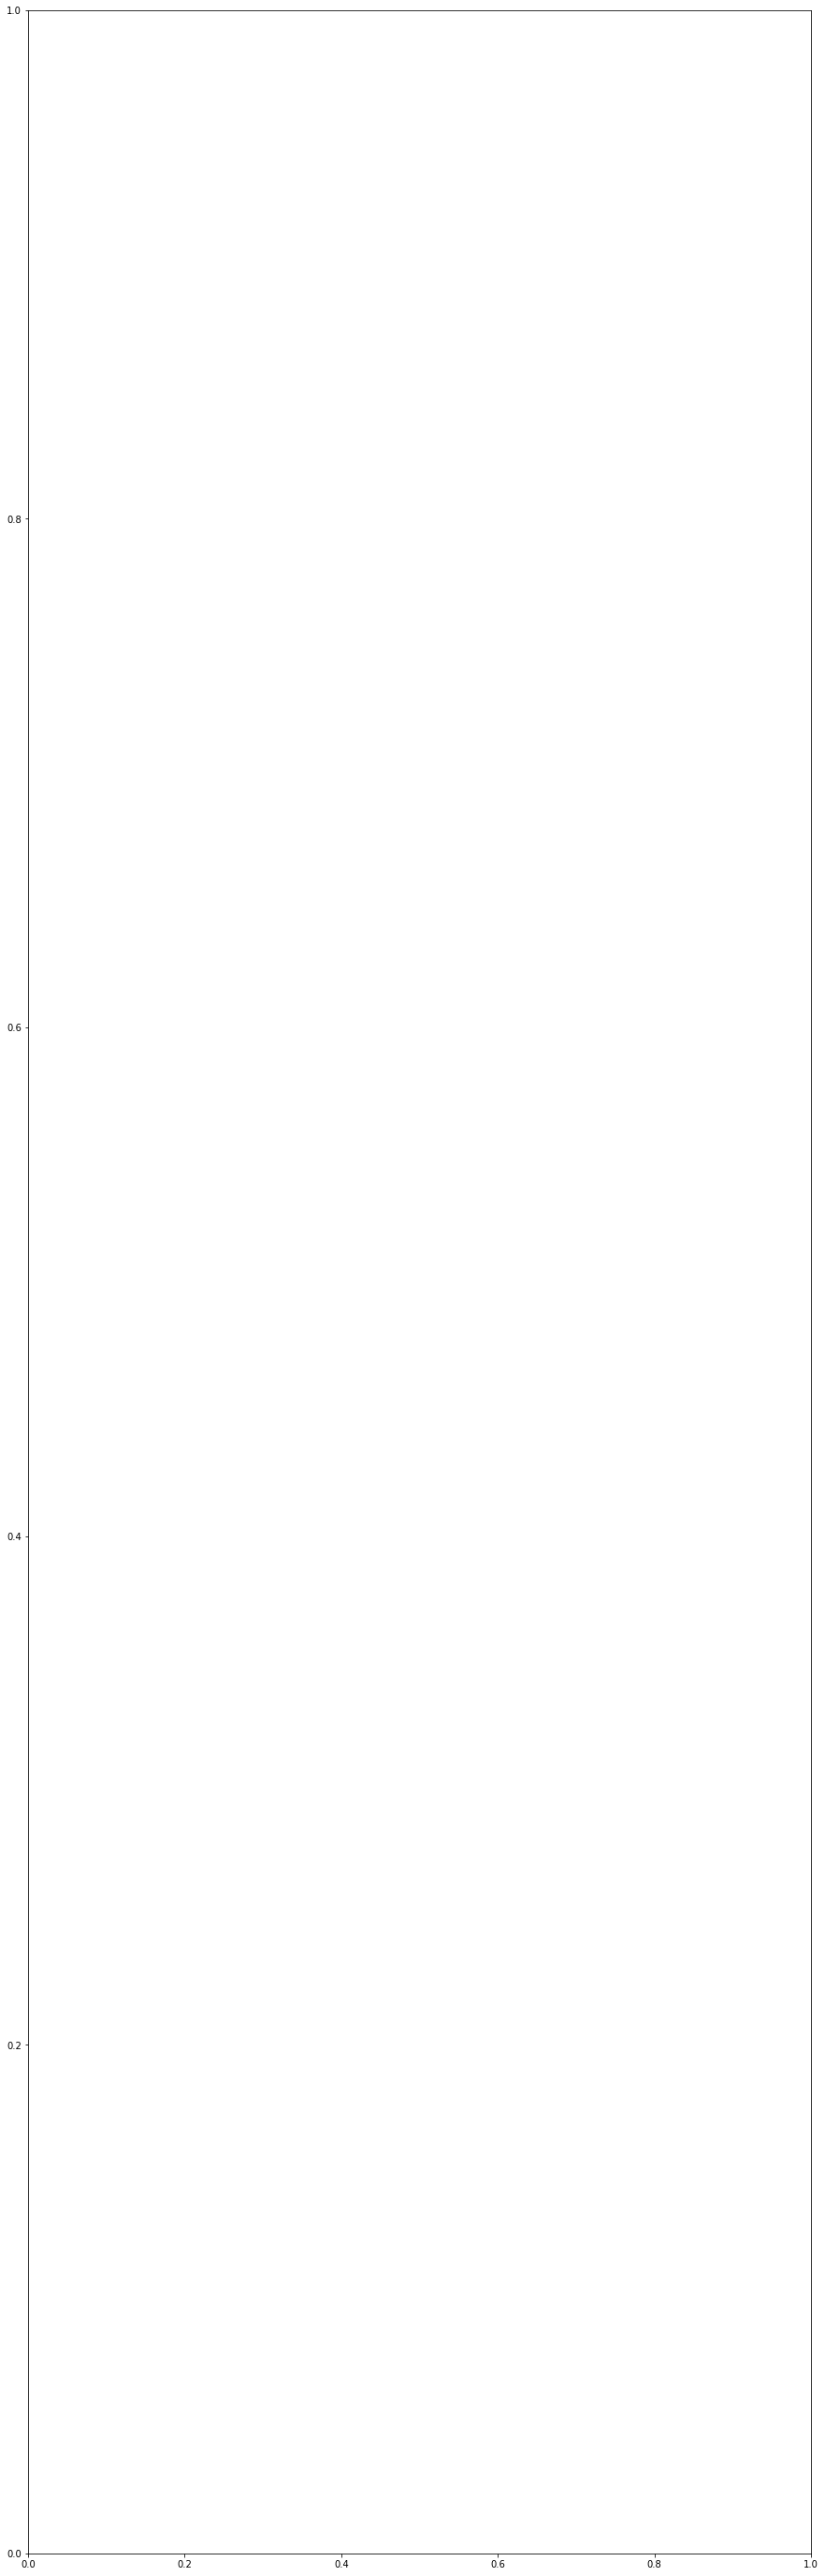

In [304]:
fig, ax  = plt.subplots(1,1, figsize=(15,50))
xgb.plot_importance(model, ax = ax)

In [296]:
train_lgb, test_lgb ,model = func(train,train_label,test,'lgb')

[1]	training's rmse: 0.733176	valid_1's rmse: 0.74154
Training until validation scores don't improve for 200 rounds.
[2]	training's rmse: 0.722868	valid_1's rmse: 0.733497
[3]	training's rmse: 0.71247	valid_1's rmse: 0.724999
[4]	training's rmse: 0.701702	valid_1's rmse: 0.716092
[5]	training's rmse: 0.691904	valid_1's rmse: 0.708723
[6]	training's rmse: 0.682286	valid_1's rmse: 0.700809
[7]	training's rmse: 0.672785	valid_1's rmse: 0.693344
[8]	training's rmse: 0.664712	valid_1's rmse: 0.687392
[9]	training's rmse: 0.655148	valid_1's rmse: 0.679948
[10]	training's rmse: 0.647307	valid_1's rmse: 0.673894
[11]	training's rmse: 0.63918	valid_1's rmse: 0.667526
[12]	training's rmse: 0.631793	valid_1's rmse: 0.662183
[13]	training's rmse: 0.624425	valid_1's rmse: 0.656529
[14]	training's rmse: 0.616755	valid_1's rmse: 0.650622
[15]	training's rmse: 0.609821	valid_1's rmse: 0.645423
[16]	training's rmse: 0.603973	valid_1's rmse: 0.64153
[17]	training's rmse: 0.597402	valid_1's rmse: 0.63763

[147]	training's rmse: 0.30737	valid_1's rmse: 0.518462
[148]	training's rmse: 0.306307	valid_1's rmse: 0.51835
[149]	training's rmse: 0.305193	valid_1's rmse: 0.517886
[150]	training's rmse: 0.304053	valid_1's rmse: 0.517755
[151]	training's rmse: 0.30309	valid_1's rmse: 0.517628
[152]	training's rmse: 0.302071	valid_1's rmse: 0.517607
[153]	training's rmse: 0.301057	valid_1's rmse: 0.517311
[154]	training's rmse: 0.299997	valid_1's rmse: 0.517285
[155]	training's rmse: 0.298884	valid_1's rmse: 0.517146
[156]	training's rmse: 0.297814	valid_1's rmse: 0.517041
[157]	training's rmse: 0.296766	valid_1's rmse: 0.516857
[158]	training's rmse: 0.295668	valid_1's rmse: 0.516639
[159]	training's rmse: 0.294716	valid_1's rmse: 0.516458
[160]	training's rmse: 0.293676	valid_1's rmse: 0.516184
[161]	training's rmse: 0.292686	valid_1's rmse: 0.516139
[162]	training's rmse: 0.291667	valid_1's rmse: 0.515919
[163]	training's rmse: 0.290723	valid_1's rmse: 0.515644
[164]	training's rmse: 0.289671	va

[300]	training's rmse: 0.191079	valid_1's rmse: 0.505502
[301]	training's rmse: 0.190562	valid_1's rmse: 0.505507
[302]	training's rmse: 0.19006	valid_1's rmse: 0.505458
[303]	training's rmse: 0.189607	valid_1's rmse: 0.505435
[304]	training's rmse: 0.189136	valid_1's rmse: 0.505367
[305]	training's rmse: 0.188654	valid_1's rmse: 0.505332
[306]	training's rmse: 0.188096	valid_1's rmse: 0.505246
[307]	training's rmse: 0.187639	valid_1's rmse: 0.505188
[308]	training's rmse: 0.187161	valid_1's rmse: 0.505169
[309]	training's rmse: 0.186648	valid_1's rmse: 0.505168
[310]	training's rmse: 0.186185	valid_1's rmse: 0.505098
[311]	training's rmse: 0.1857	valid_1's rmse: 0.505039
[312]	training's rmse: 0.185211	valid_1's rmse: 0.504963
[313]	training's rmse: 0.184777	valid_1's rmse: 0.504875
[314]	training's rmse: 0.184351	valid_1's rmse: 0.504893
[315]	training's rmse: 0.183833	valid_1's rmse: 0.504768
[316]	training's rmse: 0.18348	valid_1's rmse: 0.504703
[317]	training's rmse: 0.183076	val

[503]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[504]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[505]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[506]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[507]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[508]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[509]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[510]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[511]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[512]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[513]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[514]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[515]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[516]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[517]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[518]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[519]	training's rmse: 0.172071	valid_1's rmse: 0.50401
[520]	training's rmse: 0.172071	valid_1's rmse: 

[95]	training's rmse: 0.377113	valid_1's rmse: 0.528181
[96]	training's rmse: 0.375496	valid_1's rmse: 0.527926
[97]	training's rmse: 0.374032	valid_1's rmse: 0.527631
[98]	training's rmse: 0.372479	valid_1's rmse: 0.526887
[99]	training's rmse: 0.370837	valid_1's rmse: 0.526794
[100]	training's rmse: 0.369356	valid_1's rmse: 0.5264
[101]	training's rmse: 0.367906	valid_1's rmse: 0.526166
[102]	training's rmse: 0.366399	valid_1's rmse: 0.525962
[103]	training's rmse: 0.364913	valid_1's rmse: 0.525783
[104]	training's rmse: 0.363387	valid_1's rmse: 0.525788
[105]	training's rmse: 0.36186	valid_1's rmse: 0.525481
[106]	training's rmse: 0.360447	valid_1's rmse: 0.525324
[107]	training's rmse: 0.359132	valid_1's rmse: 0.524926
[108]	training's rmse: 0.358134	valid_1's rmse: 0.524603
[109]	training's rmse: 0.356764	valid_1's rmse: 0.524215
[110]	training's rmse: 0.355436	valid_1's rmse: 0.523959
[111]	training's rmse: 0.354077	valid_1's rmse: 0.523784
[112]	training's rmse: 0.352587	valid_1

[426]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[427]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[428]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[429]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[430]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[431]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[432]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[433]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[434]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[435]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[436]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[437]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[438]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[439]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[440]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[441]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[442]	training's rmse: 0.171199	valid_1's rmse: 0.503328
[443]	training's rmse: 0.171199

[12]	training's rmse: 0.635982	valid_1's rmse: 0.653913
[13]	training's rmse: 0.628932	valid_1's rmse: 0.648391
[14]	training's rmse: 0.621819	valid_1's rmse: 0.64346
[15]	training's rmse: 0.61541	valid_1's rmse: 0.638578
[16]	training's rmse: 0.609787	valid_1's rmse: 0.634523
[17]	training's rmse: 0.603058	valid_1's rmse: 0.629323
[18]	training's rmse: 0.596361	valid_1's rmse: 0.624782
[19]	training's rmse: 0.591141	valid_1's rmse: 0.621068
[20]	training's rmse: 0.585277	valid_1's rmse: 0.616867
[21]	training's rmse: 0.579614	valid_1's rmse: 0.613052
[22]	training's rmse: 0.574825	valid_1's rmse: 0.609962
[23]	training's rmse: 0.569877	valid_1's rmse: 0.606668
[24]	training's rmse: 0.564625	valid_1's rmse: 0.603634
[25]	training's rmse: 0.559562	valid_1's rmse: 0.600278
[26]	training's rmse: 0.555211	valid_1's rmse: 0.597438
[27]	training's rmse: 0.550885	valid_1's rmse: 0.595098
[28]	training's rmse: 0.54662	valid_1's rmse: 0.592494
[29]	training's rmse: 0.54215	valid_1's rmse: 0.589

[159]	training's rmse: 0.298695	valid_1's rmse: 0.502653
[160]	training's rmse: 0.297896	valid_1's rmse: 0.502411
[161]	training's rmse: 0.29694	valid_1's rmse: 0.502431
[162]	training's rmse: 0.295839	valid_1's rmse: 0.502192
[163]	training's rmse: 0.294737	valid_1's rmse: 0.502204
[164]	training's rmse: 0.293778	valid_1's rmse: 0.502079
[165]	training's rmse: 0.292853	valid_1's rmse: 0.501736
[166]	training's rmse: 0.291876	valid_1's rmse: 0.50151
[167]	training's rmse: 0.290784	valid_1's rmse: 0.501468
[168]	training's rmse: 0.289803	valid_1's rmse: 0.501375
[169]	training's rmse: 0.288715	valid_1's rmse: 0.501125
[170]	training's rmse: 0.287646	valid_1's rmse: 0.50095
[171]	training's rmse: 0.286689	valid_1's rmse: 0.500868
[172]	training's rmse: 0.285819	valid_1's rmse: 0.5007
[173]	training's rmse: 0.284955	valid_1's rmse: 0.500478
[174]	training's rmse: 0.283852	valid_1's rmse: 0.500167
[175]	training's rmse: 0.282924	valid_1's rmse: 0.500088
[176]	training's rmse: 0.281942	vali

[314]	training's rmse: 0.185834	valid_1's rmse: 0.491175
[315]	training's rmse: 0.185357	valid_1's rmse: 0.49114
[316]	training's rmse: 0.184866	valid_1's rmse: 0.491101
[317]	training's rmse: 0.184389	valid_1's rmse: 0.491152
[318]	training's rmse: 0.183929	valid_1's rmse: 0.491147
[319]	training's rmse: 0.183516	valid_1's rmse: 0.491157
[320]	training's rmse: 0.183124	valid_1's rmse: 0.49112
[321]	training's rmse: 0.182738	valid_1's rmse: 0.491087
[322]	training's rmse: 0.182297	valid_1's rmse: 0.491041
[323]	training's rmse: 0.181859	valid_1's rmse: 0.491043
[324]	training's rmse: 0.181435	valid_1's rmse: 0.491041
[325]	training's rmse: 0.181023	valid_1's rmse: 0.490963
[326]	training's rmse: 0.180613	valid_1's rmse: 0.490905
[327]	training's rmse: 0.180142	valid_1's rmse: 0.490964
[328]	training's rmse: 0.179758	valid_1's rmse: 0.490968
[329]	training's rmse: 0.179326	valid_1's rmse: 0.491029
[330]	training's rmse: 0.178949	valid_1's rmse: 0.491006
[331]	training's rmse: 0.178544	v

[467]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[468]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[469]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[470]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[471]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[472]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[473]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[474]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[475]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[476]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[477]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[478]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[479]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[480]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[481]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[482]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[483]	training's rmse: 0.170985	valid_1's rmse: 0.490802
[484]	training's rmse: 0.170985

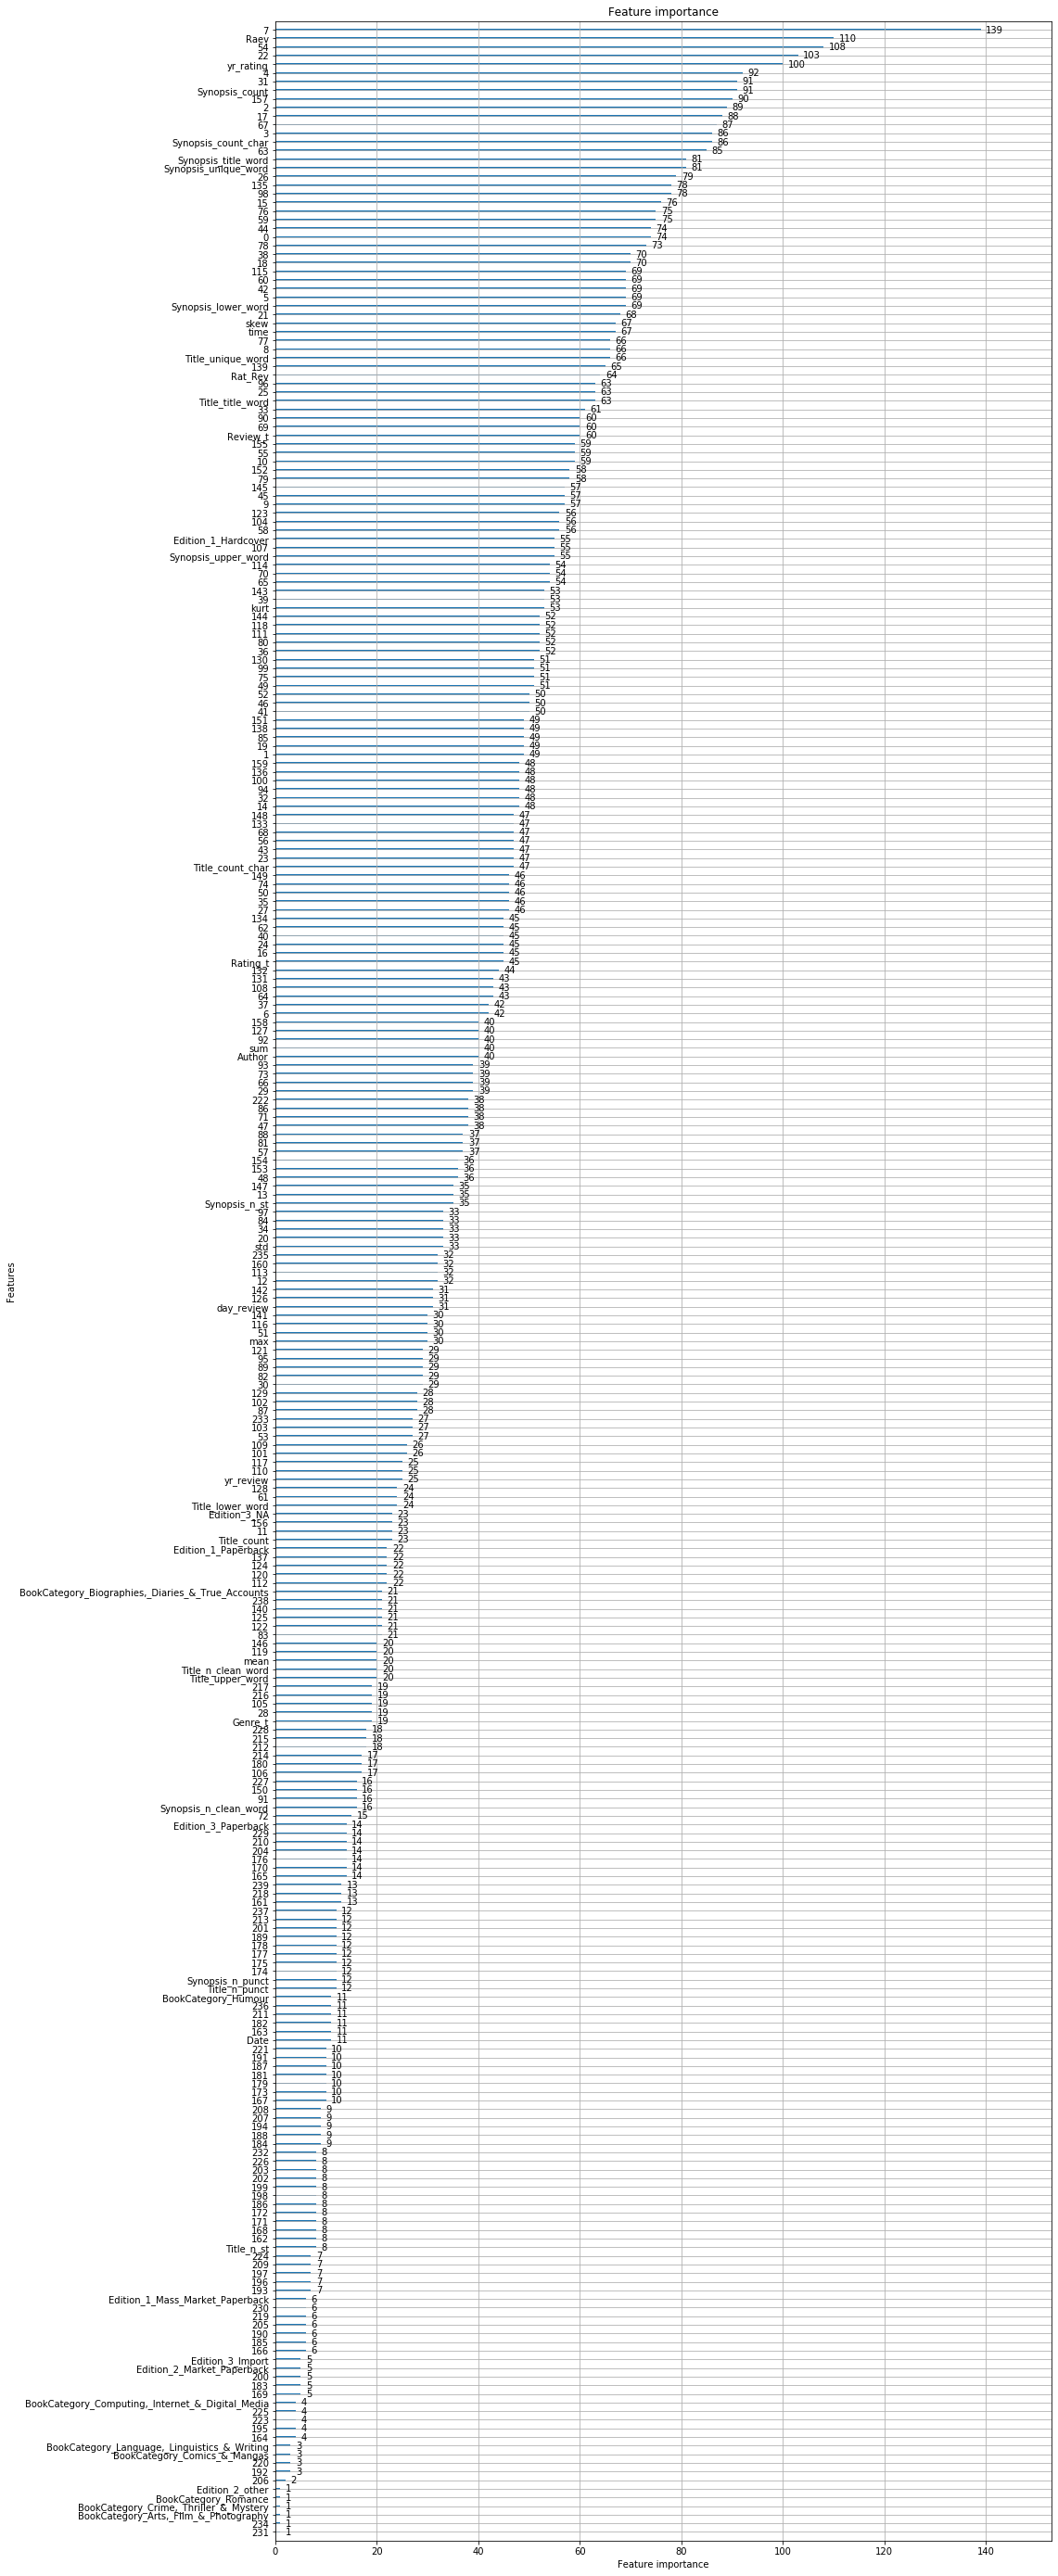

In [297]:
fig, ax  = plt.subplots(1,1, figsize=(15,50))
lgb.plot_importance(model, ax= ax)

In [298]:
test_lgb_1 = np.exp(test_lgb)-1
#test_xgb_1 = np.exp(test_xgb)-1

In [299]:
answer1 = np.mean(test_lgb_1, axis = 1)

In [188]:
df = pd.concat([test_lgb_1, test_xgb_1], axis = 1)
answer1 = np.mean(df, axis = 1)

In [308]:
train_xgb_1 = np.exp(train_xgb)-1
train_lgb_1 = np.exp(train_lgb)-1

In [332]:
from sklearn.model_selection import RandomizedSearchCV
param = {'max_depth':[7,9,11,13,15], 'min_samples_split':[19,27,33,37,41], 'min_samples_leaf':[25,27,33,37,41],
        'max_leaf_nodes': [15,21,25,29,33], 'n_estimators':[800]}
r = RandomizedSearchCV(param_distributions=param , estimator=rf, scoring=metric)
r.fit(pd.concat([train_lgb_1, train_xgb_1], axis = 1), np.exp(train_label)-1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   rando...b

In [333]:
r.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features='auto', max_leaf_nodes=33,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=41, min_samples_split=41,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=19, verbose=0,
                      warm_start=False)

In [336]:
r.best_score_

0.8681587602577643

In [337]:
rf = r.best_estimator_

In [339]:
%%time
from sklearn.ensemble import RandomForestRegressor


rf.fit(pd.concat([train_lgb_1, train_xgb_1], axis = 1), np.exp(train_label)-1)
answer = rf.predict(pd.concat([test_lgb_1, test_xgb_1], axis = 1))

Wall time: 17.9 s


In [63]:
sample.Price = np.exp(answer)-1

In [300]:
sample.Price = answer1.values

In [340]:
sample.Price = answer

In [66]:
sample.to_excel('answer8.xlsx', index=False)

In [67]:
sample

,Price
0,455.778450
1,1148.032972
2,320.971082
3,743.104511
4,344.886602
...,...
1555,1739.863795
1556,198.600756
1557,453.976811
1558,503.914681


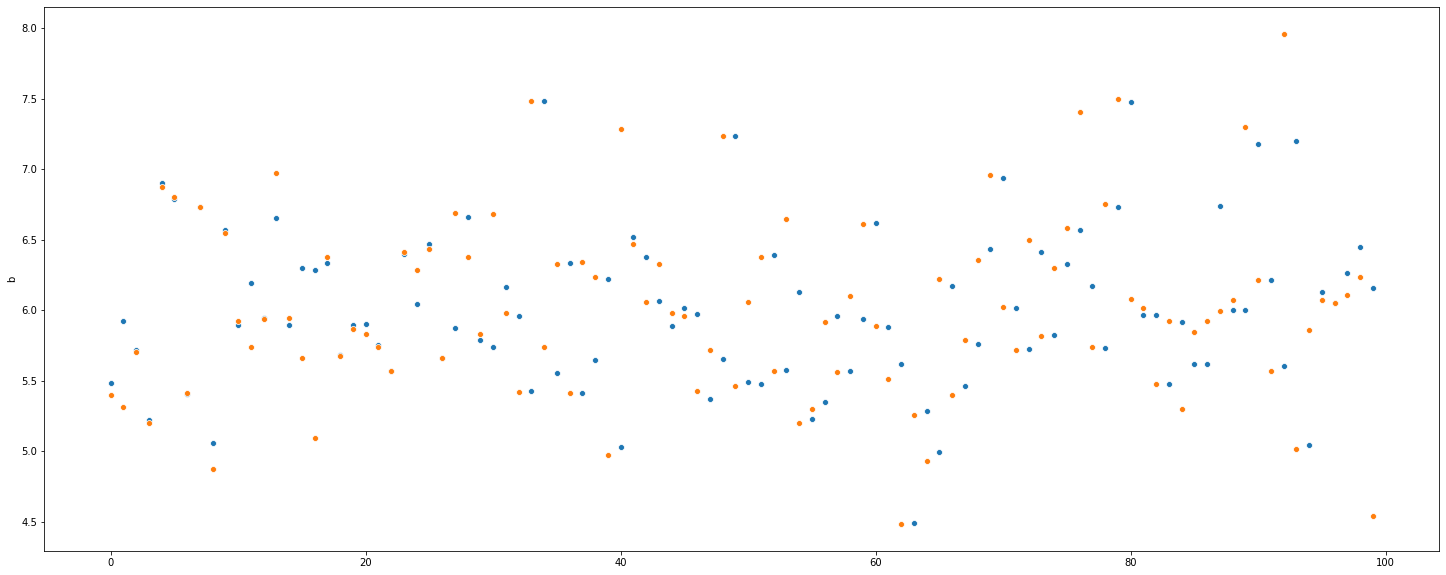

In [810]:
df = pd.concat([train_lgb[0], train_label], axis = 1)
df.columns = ['a','b']
df.reset_index(inplace=True)
plt.figure(figsize=(25,10))
sns.scatterplot(df.index[0:100], df.a[0:100])
sns.scatterplot(df.index[0:100], df.b[0:100])
#df.iloc[0:10].plot('index', 'b', colors = 'r',kind='scatter')
#df.iloc[0:10].plot('index', 'a', colors = 'r',kind='scatter')